# Credit Card Fraud Detection

**Context:**
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset contains transactions made by credit cards in September 2013 by European cardholders. 

- The dataset contains of 31 columns where Features **V1, V2, … V28** are the principal components obtained with PCA, Feature **'Time'** contains the seconds elapsed between each transaction and the The feature **'Amount'** is the transaction Amount. Atlast the Feature **'Class'** is the output variable and it takes value 1 in case of Fraud and 0 for Non-Fraud transaction.


**Importing the necessary libraries/packages**

In [1]:
#importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("/Users/harsh/Documents/INTERN/Code Clause/Credit Card Fraud")

In [2]:
import warnings

warnings.filterwarnings("ignore")

**Analyzing the dataset**

In [3]:
#reading dataset

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Shape of data

print ('No. of Features : ', df.shape[1])
print ('No. of Rows : ',df.shape[0])

No. of Features :  31
No. of Rows :  284807


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print("No. of Missing values: ",df.isnull().sum().max())

No. of Missing values:  0


In [8]:
print("No. of duplicate rows: ",df.duplicated().sum())

No. of duplicate rows:  1081


In [9]:
df = df.drop_duplicates()
print("No. of row after removing duplicates: ",df.shape[0])

No. of row after removing duplicates:  283726


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Note that the transaction amount has a min value zero(0) practically no one transfers zero(0) rupees and also the min time is also zero(0) which is also not possible. Therefore we remove the rows with time and amount zero(0)

In [11]:
con1 = (df['Time']<=0)
df = df[~con1]

con2 = (df['Amount']<=0)
df = df[~con2]

**Correlation Matrix**

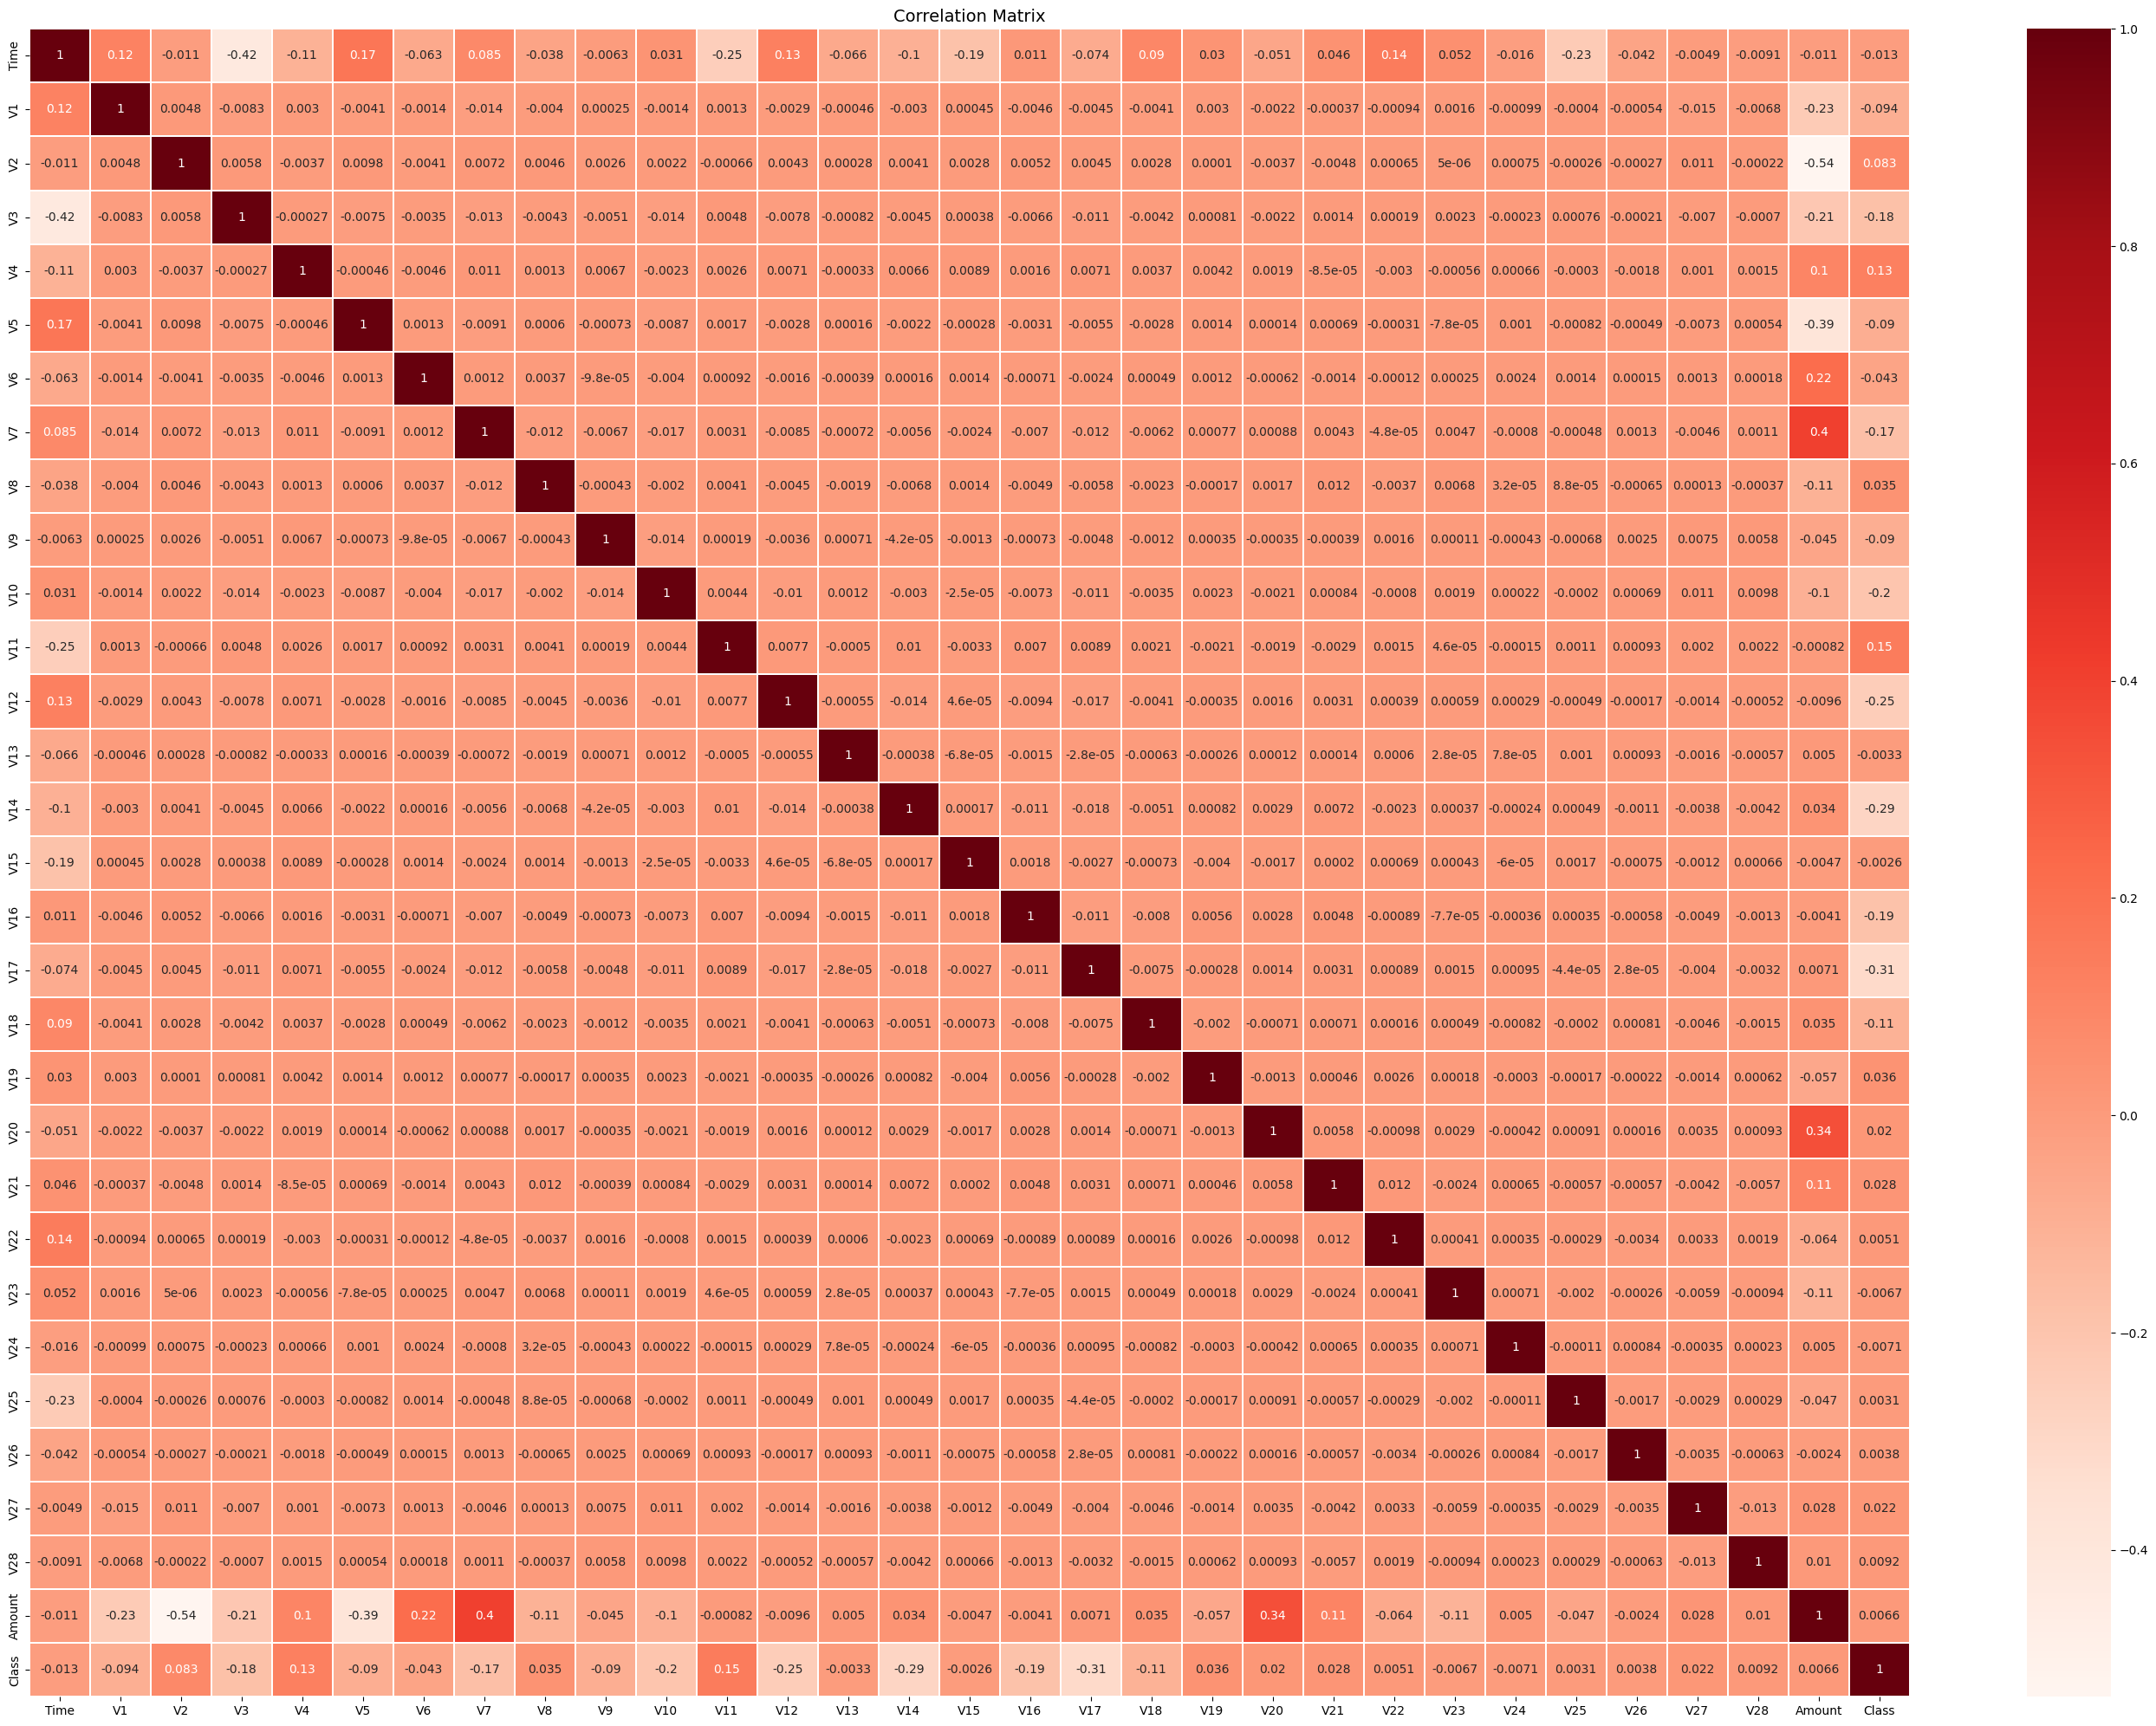

In [12]:

ig, ax = plt.subplots(figsize=(35,25))
sns.heatmap(df.corr(), cmap='Reds', annot=True, linewidth=.1, ax=ax)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

**Visualizing the frequency of fraud transactions**

In [ ]:
print('Normal transactions: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds Transactions: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

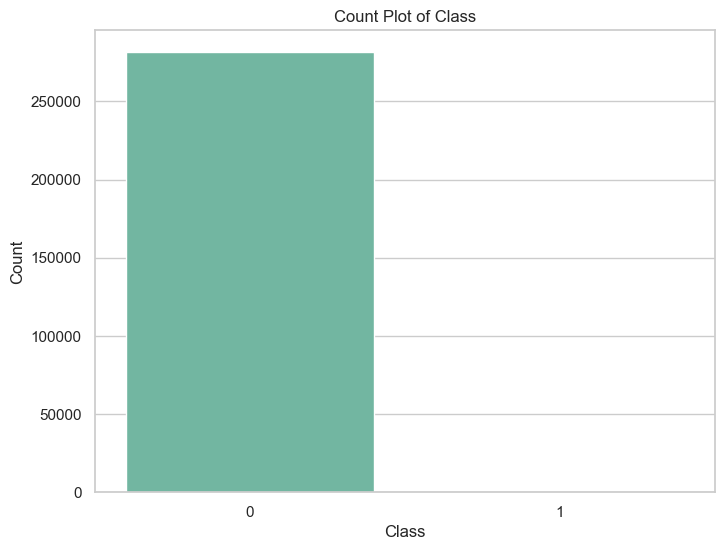

In [14]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='Class', data=df, palette='Set2')
plt.xlabel('Class')  
plt.ylabel('Count')      
plt.title('Count Plot of Class') 
plt.show()

With this viz. Notice how imbalanced our dataset is, where most of datapoints are Non-Fraud transactions. If we use this dataset for predictive model. the model will tend to assume most of the transactions as Non-Fraud. so, to avoid this type of irregularity we use **SMOTE** which increases the number of minority data points by generating synthetic examples to balance the class distribution

In [15]:
from imblearn.over_sampling import SMOTE

cols = df.columns[0:30]
Os = SMOTE()
x,y = Os.fit_resample(df[cols],df['Class'])

In [16]:
x.shape, y.shape

((562936, 30), (562936,))

In [17]:
df1 = pd.DataFrame(x,columns=cols)
df2 = pd.DataFrame(y,columns=['Class'])
df = pd.concat([df1,df2],axis=1)
df.shape

(562936, 31)

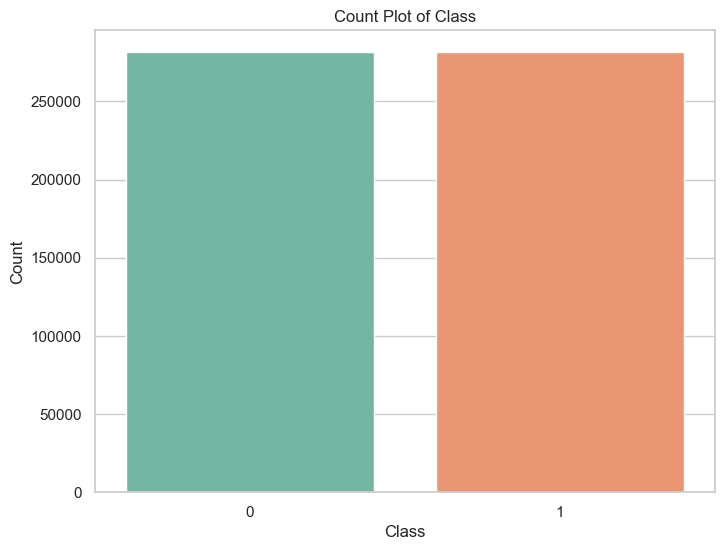

In [18]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='Class', data=df, palette='Set2')
plt.xlabel('Class')  
plt.ylabel('Count')      
plt.title('Count Plot of Class') 
plt.show()

Now our data is balanced using the SMOTE technique

**Visualizing Transaction Time and Amount Transferred**

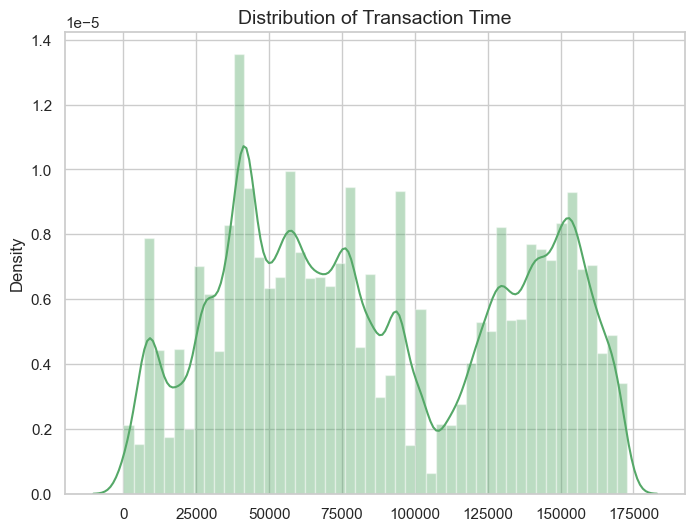

In [19]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6)) 

time_val = df['Time'].values

sns.distplot(time_val, color='g')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.show()

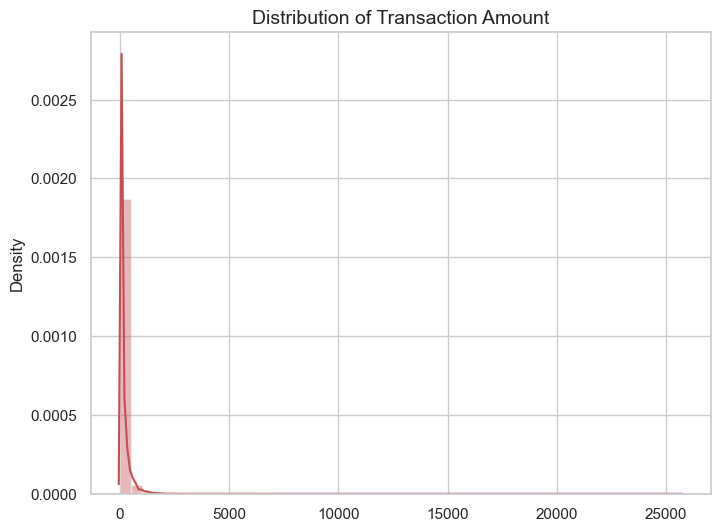

In [20]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6)) 

amount_val = df['Amount'].values

sns.distplot(amount_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.show()

**Visualizing anonymous features ie) v1,v2,v3,v4,......,v28**

In [21]:
v_features = df.iloc[:,1:29].columns

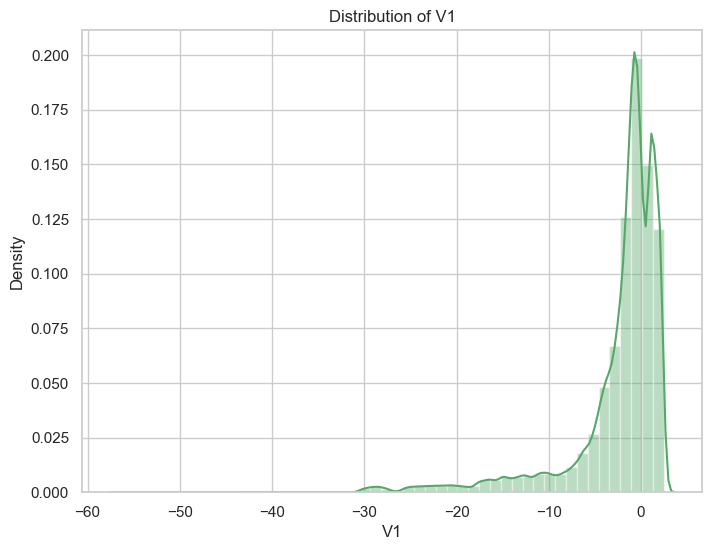

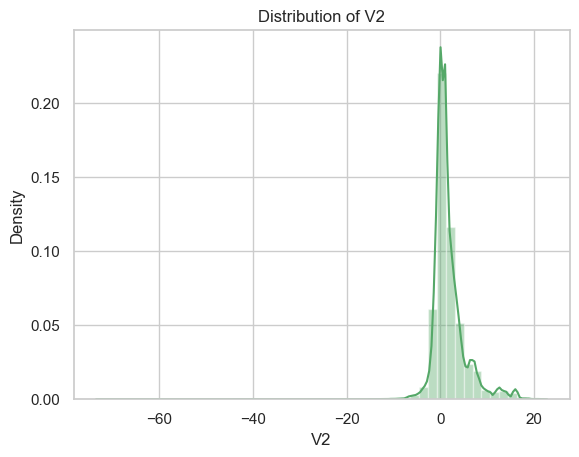

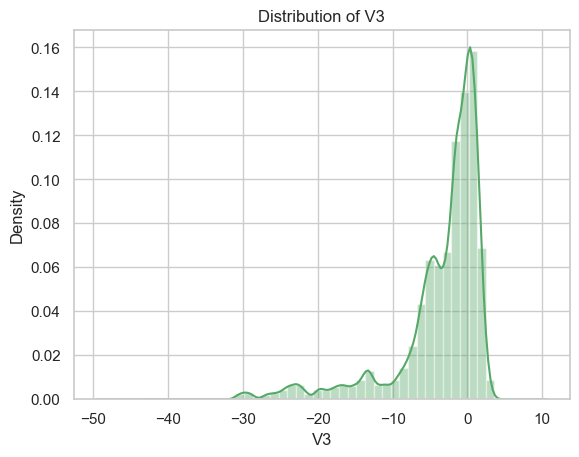

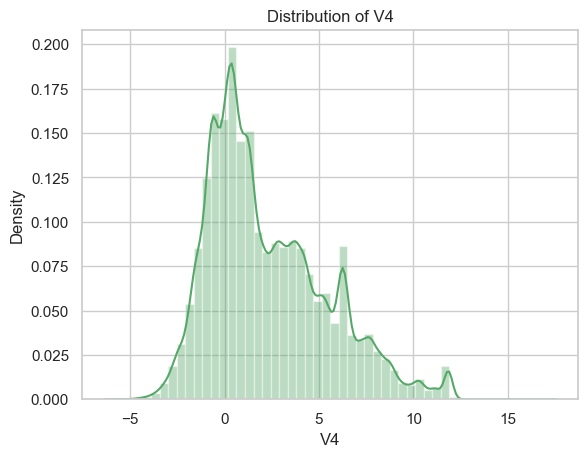

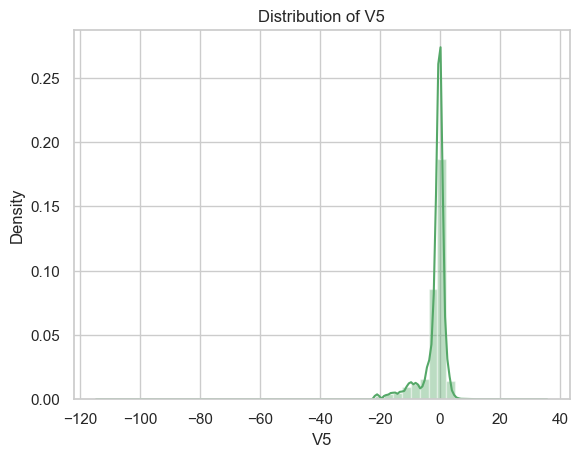

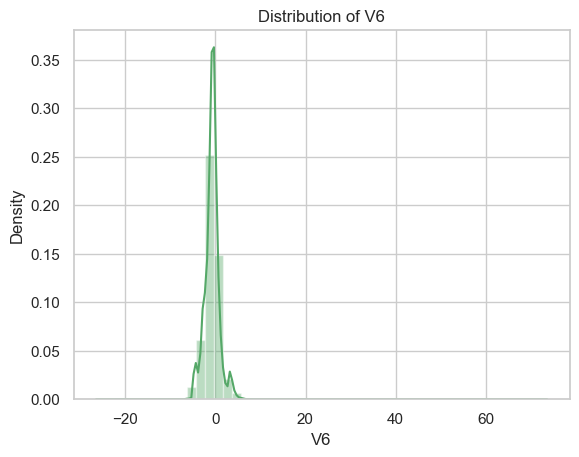

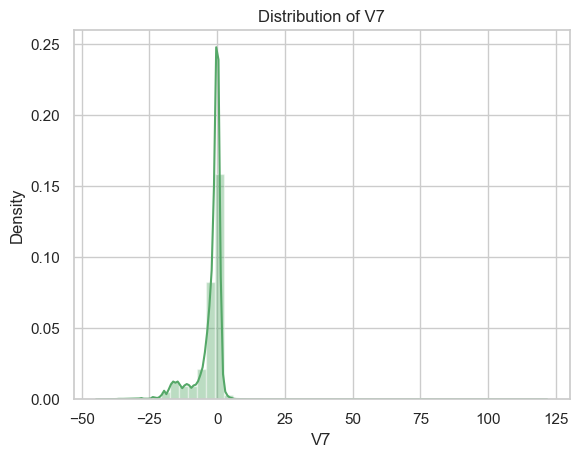

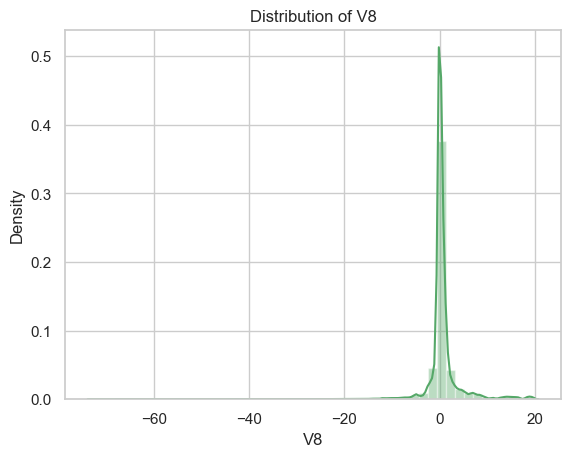

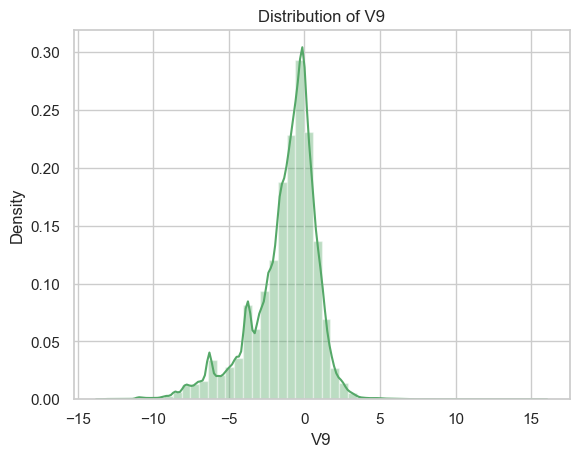

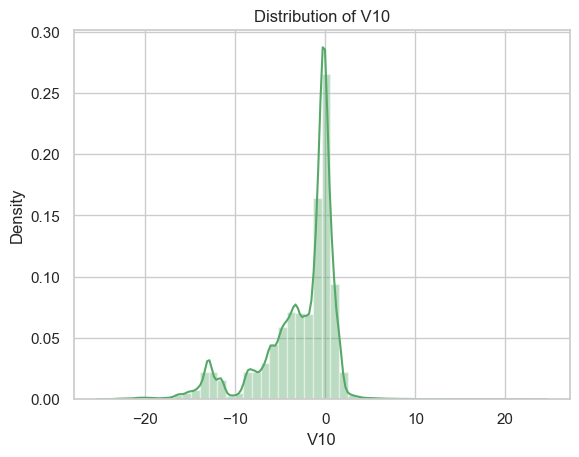

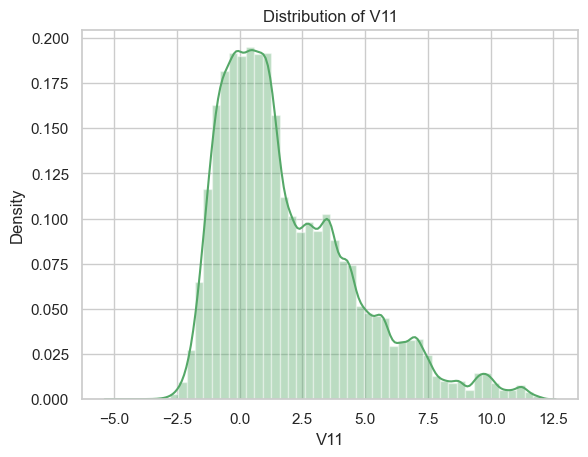

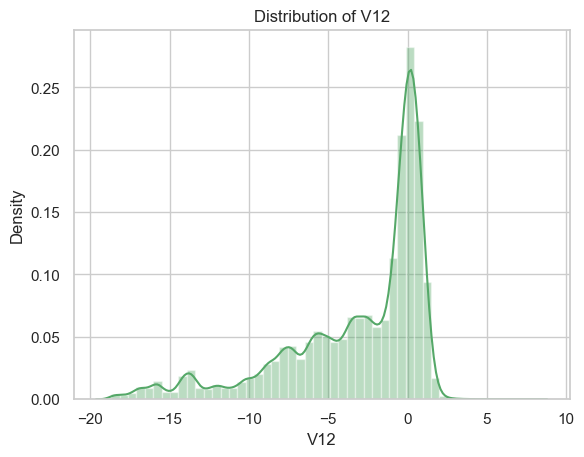

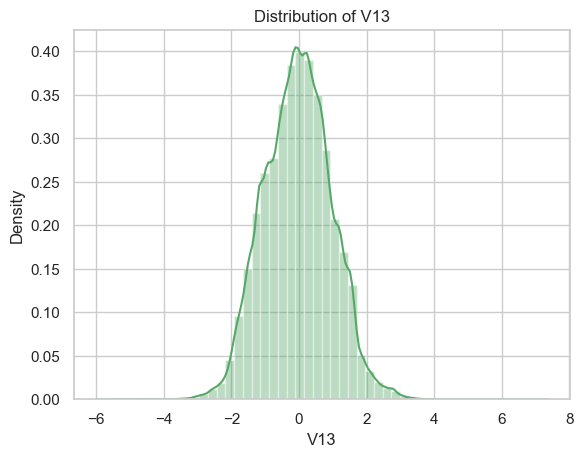

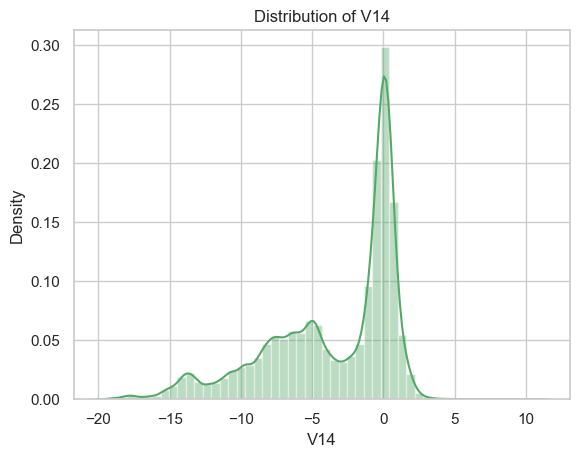

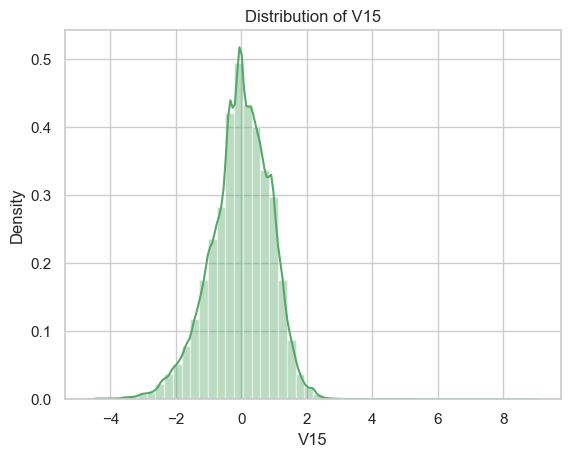

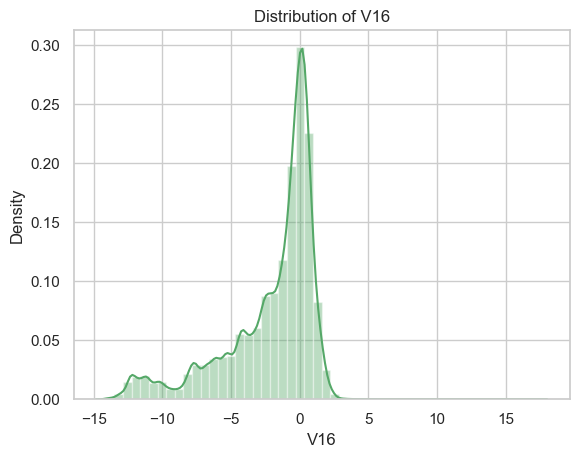

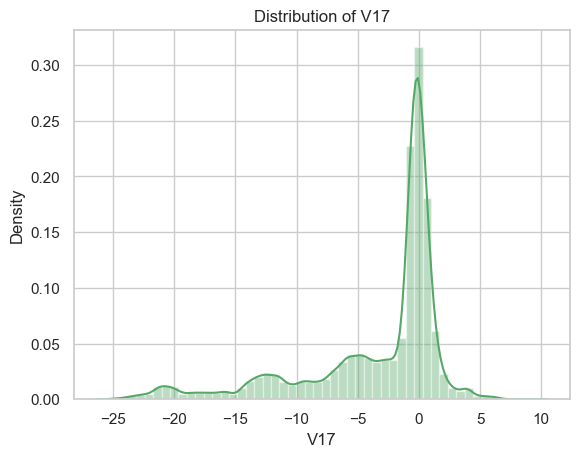

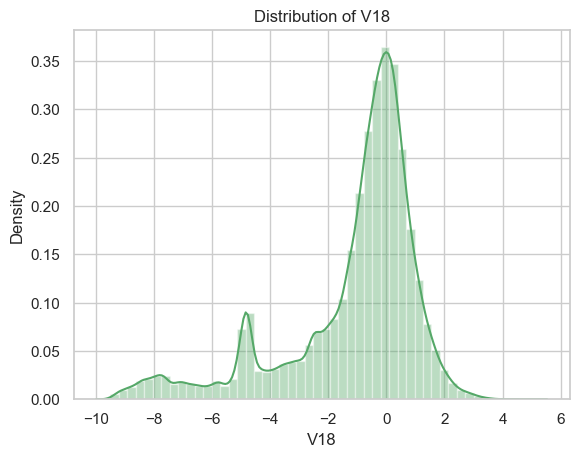

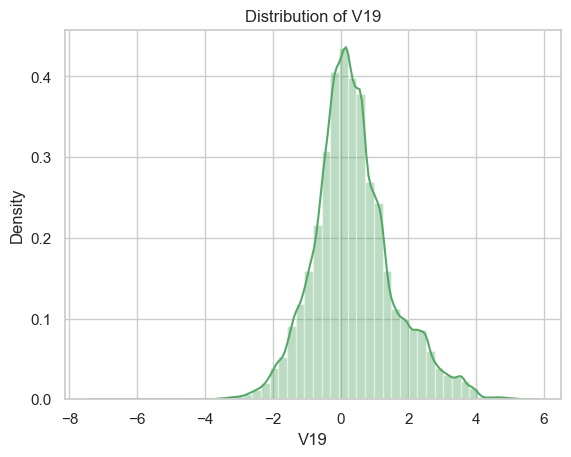

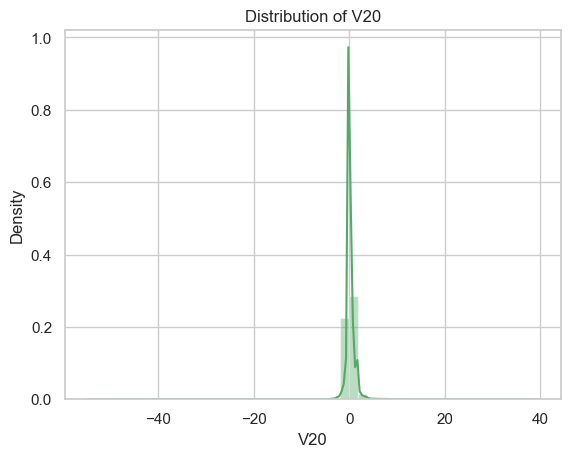

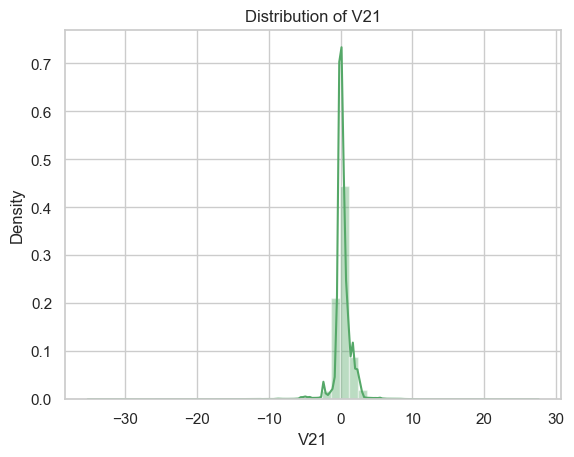

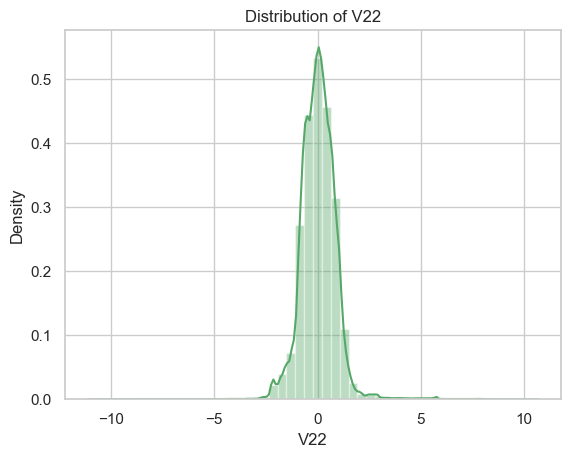

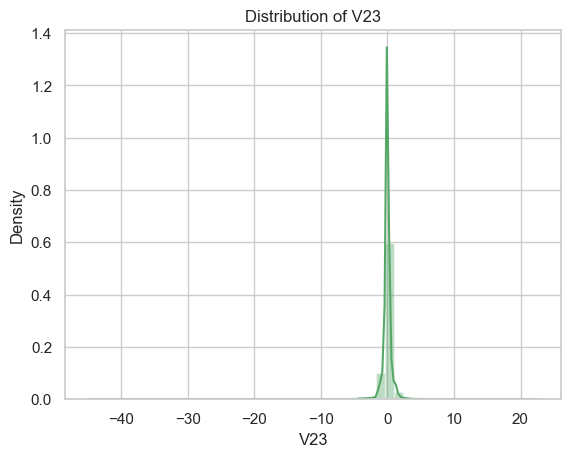

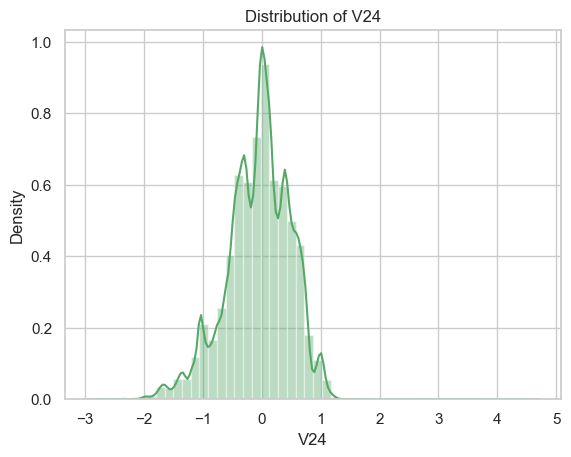

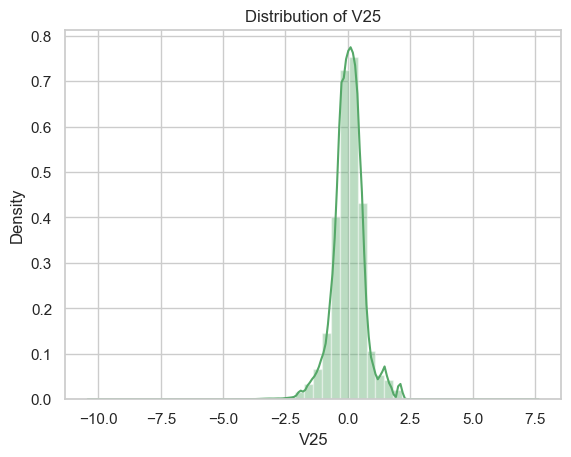

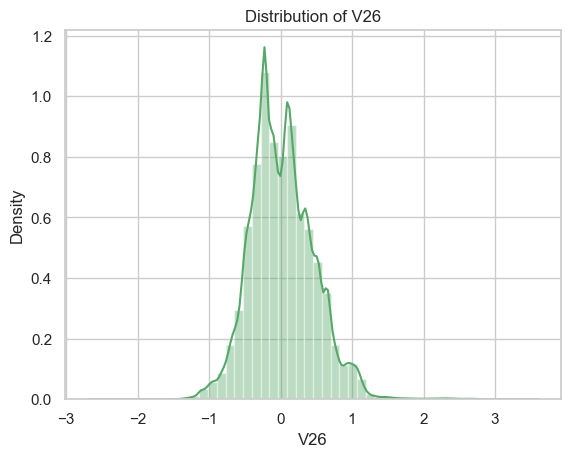

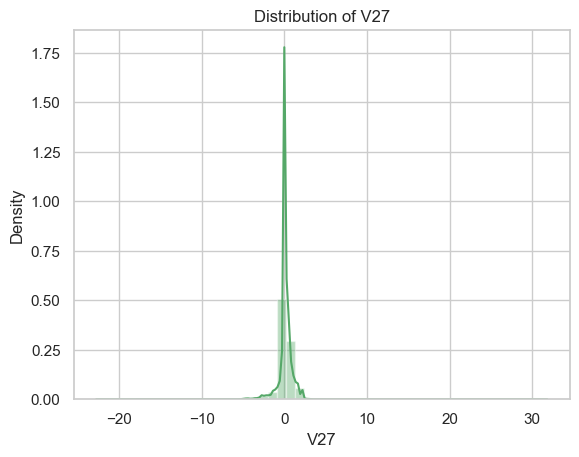

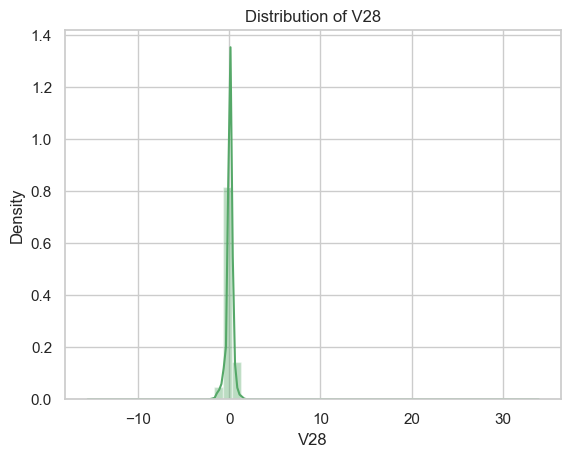

In [22]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6)) 

for i in v_features:
    vals = df[i]
    sns.distplot(vals, color='g')
    plt.title('Distribution of '+i)
    plt.show()

**Preprocessing**

In [23]:
# Sice most of our data are scaled except (Time and Amount)
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
robs_scaler = RobustScaler()

df['scaled_amount'] = robs_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = robs_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [24]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Now the Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,3.659233,-0.865615,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
1,0.987400,-0.865615,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
2,0.427086,-0.865604,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
3,-0.267364,-0.865604,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
4,-0.253542,-0.865582,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0


**Creating Training and Testing dataset**

In [25]:
X = df.drop(labels='Class', axis=1) 
y = df.loc[:,'Class']              

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number of rows in training dataset: ", len(X_train))
print("Number of rows in testing dataset ", len(X_test))

Number of rows in training dataset:  394055
Number of rows in testing dataset  168881


**Logistic Regression Model**

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100,"%")
print("Precision: ",precision_score(y_test, y_pred)*100,"%")
print("Recall: " ,recall_score(y_test, y_pred)*100,"%")
print("F1 Score: ", f1_score(y_test, y_pred)*100,"%")

Accuracy Score:  98.04240855987352 %
Precision:  99.13599070645466 %
Recall:  96.9331250887406 %
F1 Score:  98.02218313650883 %


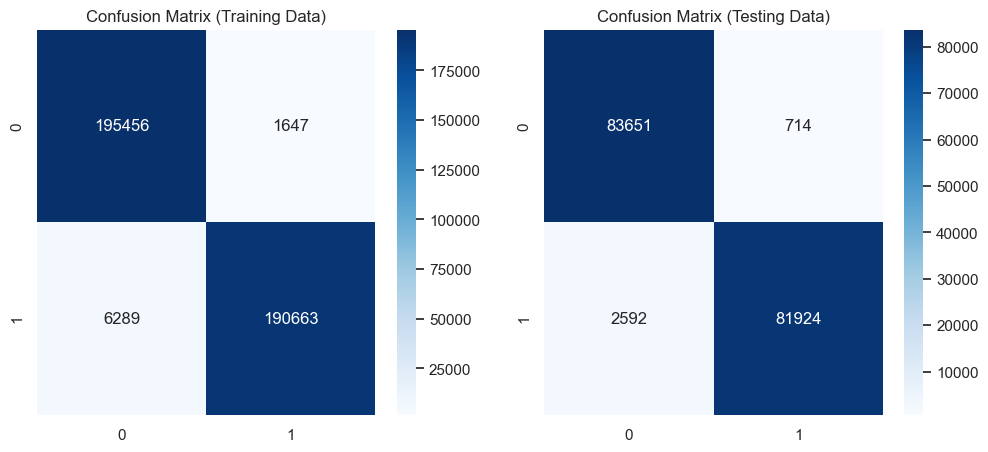

In [28]:
from sklearn.metrics import confusion_matrix

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Create confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training Data)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Testing Data)')

plt.show()

Based on the performance metrics of the  model, it appears that model is performing quite well, especially in terms of accuracy, precision, and recall. 

Here's an assessment of the model based on the performance metrics:

- **Accuracy Score (97.99%):** The model is achieving a high level of overall accuracy, indicating that it correctly classifies a significant portion of the data.

- **Precision (99.15%):** The high precision suggests that when the model predicts the positive class, it is correct about 99.15% of the time. This is an excellent result, especially if false positives are costly or undesirable.

- **Recall (96.80%):** The high recall indicates that the model is capturing about 96.80% of the actual positive cases. This is crucial in scenarios where we want to minimize false negatives (i.e., missing actual positive cases is costly or dangerous).

- **F1 Score (97.96%):** The F1 score combines precision and recall into a single metric, and the model's F1 score is close to the highest possible value of 100%. This suggests that the model achieves a good balance between precision and recall.

Overall, based on these metrics, the model seems to be performing very well.

**Visualizing Performance Curves**

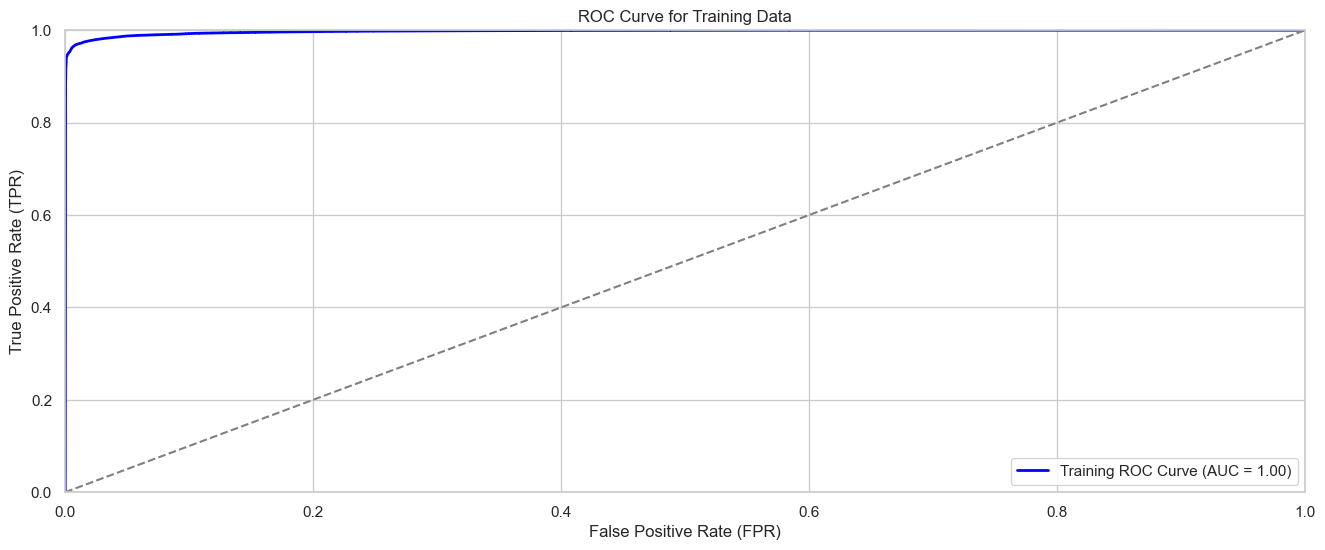

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_probs = lr_model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_probs)

# Calculate the AUC (Area Under the ROC Curve) for training data
auc_train = roc_auc_score(y_train, y_train_probs)

# Plot the ROC curve for training data
plt.figure(figsize=(16, 6))

plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Training Data')
plt.legend(loc='lower right')
plt.show()

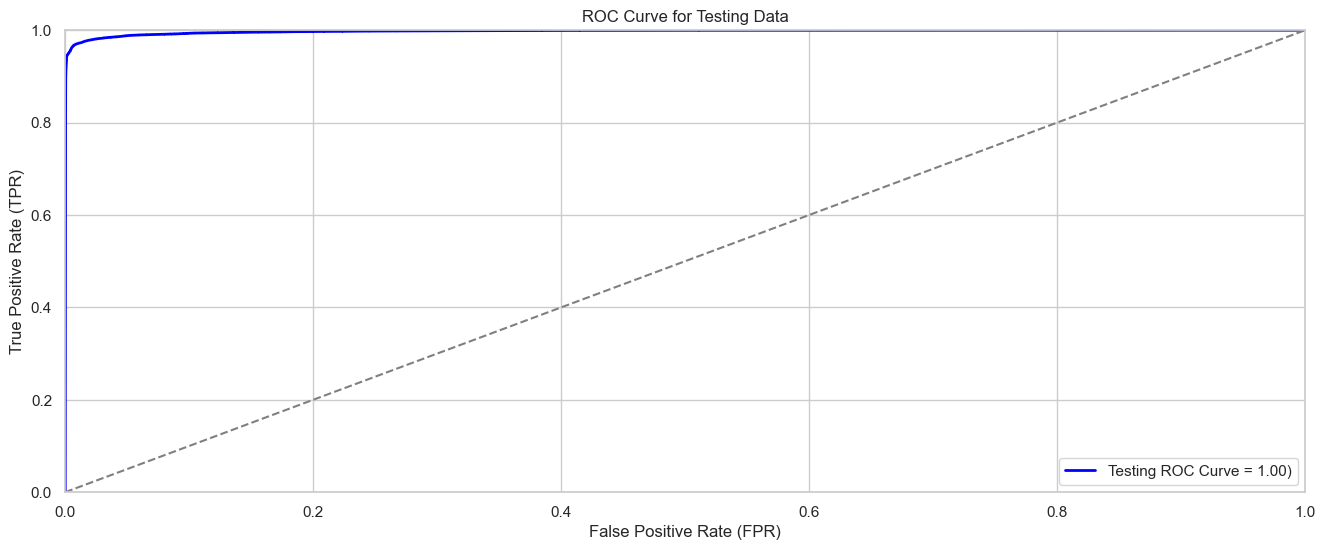

In [30]:
y_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(16, 6))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'Testing ROC Curve = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

An AUC (Area Under the ROC Curve) value of 1.0 indicates perfect discrimination by your binary classification model.
In other words, the model is capable of completely separating the positive and negative classes without making 
any classification errors. This is an ideal scenario and rarely occurs in practice.

In practical terms, when you obtain an AUC of 1.0, it means:

- **Perfect Predictions:** the model is making perfect predictions on the test data, achieving a TPR (True Positive Rate or Sensitivity) of 1.0 and an FPR (False Positive Rate or Specificity) of 0.0.

- **No Overlapping Distributions:** The predicted probabilities of the positive and negative classes do not overlap at any threshold. In other words, for every possible threshold, you can separate the two classes with certainty.

- **Highly Discriminative Model:** The model is exceptionally good at distinguishing between the two classes, and it ranks positive instances higher than negative instances across the entire range of thresholds.

**And also we know that Achieving an AUC of 1.0 on the training data but not the test data indicates overfitting. But in our model both training and testing data is 1.0. therefore, the model is not overfitting too**

In [31]:
from sklearn.model_selection import learning_curve

# Create a learning curve for the logistic regression model
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

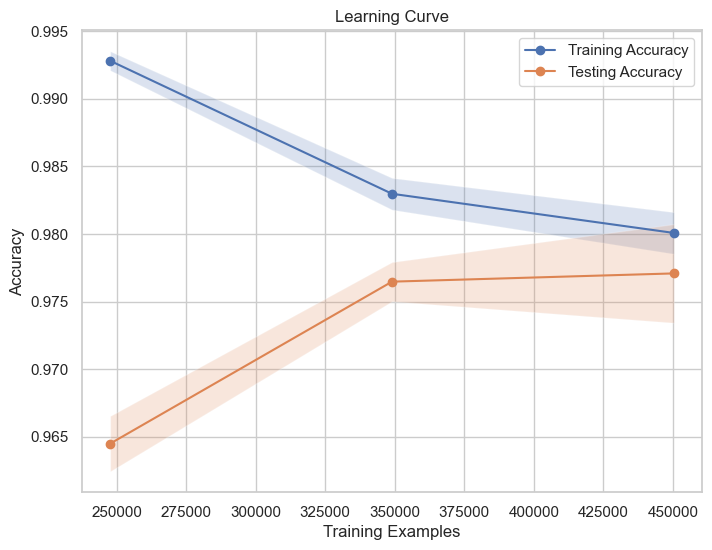

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Conclusion:**
    it's possible to work with imbalanced datasets without using SMOTE or other resampling techniques, in that case it is important to be aware of the challenges and potential biases that can arise. Careful model selection, evaluation, and hyperparameter tuning are essential when dealing with imbalanced datasets to ensure that the model performs well, especially on the minority class.